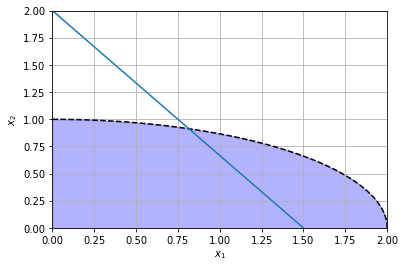

In [2]:
# plot the feasibility region
import numpy as np
import matplotlib.pyplot as plt

t = np.linspace(0,90,90)
xg = 2*np.cos(np.radians(t))
yg = np.sin(np.radians(t))
plt.plot(xg,yg,'k--')
plt.fill_between(xg, yg, color='blue', alpha = 0.3)
xh = np.linspace(0,3,20)
yh = (30 - 20*xh) / 15
plt.plot(xh, yh)

plt.xlim((0,2))
plt.ylim((0,2))
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")
plt.grid()
plt.show()

In [3]:
# Solve the case of active or binding constaint directly using a nonlinear solver
import scipy.optimize as opt
# x1, x2, lambda, beta --> x[0], x[1], x[2], x[3]
def J(x) :
    eq1 = 0.5*x[3]*x[0] + x[1] + 20*x[2]
    eq2 = x[0] + 2*x[3]*x[1] + 15*x[2]
    eq3 = 4*x[0] + 3*x[1] - 6
    eq4 = 0.25*x[0]**2 + x[1]**2 - 1
    return [eq1, eq2, eq3, eq4]

result = opt.fsolve(J, np.zeros(4)) 
print(result)


[ 0.81511541  0.91317946 -0.04391383 -0.08563926]


In [4]:
# Define all equality and inequality constraints
from scipy.optimize import Bounds
from scipy.optimize import LinearConstraint
from scipy.optimize import NonlinearConstraint
from scipy.optimize import BFGS

bounds = Bounds([0, 0], [3.0, 3.0])

linear_constraint = LinearConstraint([[20, 15]], [30], [30])

def g(x):
  return [0.25*x[0]**2 + x[1]**2]
def dg(x):
  return [[0.5*x[0], 2*x[1]]]
nonlinear_constraint = NonlinearConstraint(g, -np.inf, 1, jac=dg, hess=BFGS())

In [6]:
# The main minimization problem for f = -x1 * x2
x0 = np.array([0.5, 0])
def f(x):
    return -x[0]*x[1]
def df(x):
  result = np.zeros_like(x)
  result[0] = -x[1]
  result[1] = -x[0]
  return result

from scipy.optimize import minimize
sol = minimize(f, x0, method='trust-constr', jac=df, 
               constraints=[linear_constraint, nonlinear_constraint],
               options={'verbose': 1}, bounds=bounds)
print("Solution: ", sol.x)
print("Lagrange multipliers: ", sol.v)

`gtol` termination condition is satisfied.
Number of iterations: 15, function evaluations: 10, CG iterations: 9, optimality: 1.17e-09, constraint violation: 3.55e-15, execution time: 0.033 s.
Solution:  [0.81532189 0.91290415]
Lagrange multipliers:  [array([0.04389457]), array([0.08594715]), array([-2.46023363e-05, -1.97189895e-05])]
